In [40]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from collections import defaultdict

In [41]:

df1 = pd.read_csv('datatraining.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df2= pd.read_csv('datatest.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df3= pd.read_csv('datatest2.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df4= pd.merge(df2, df1, how='outer')

df=pd.merge(df4, df3, how='outer')
df = df.set_index(['date'])
df.head()
df.shape

(20560, 6)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20560 entries, 2015-02-02 14:19:00 to 2015-02-18 09:19:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
 5   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [43]:
del df["HumidityRatio"]

# Visualization of time series

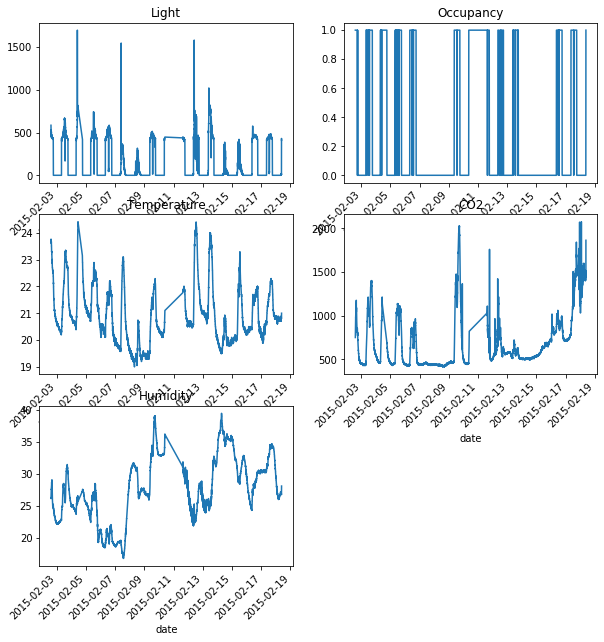

In [44]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 15)) 
fig_dims = (4,2)

plt.subplot2grid(fig_dims, (0, 0))
df['Light'].plot(x='03', title='Light')
plt.xticks(rotation=45, ha='right')

plt.subplot2grid(fig_dims, (0, 1))
df['Occupancy'].plot(title='Occupancy')
plt.xticks(rotation=45, ha='right')

plt.subplot2grid(fig_dims, (1, 0))
df['Temperature'].plot(title='Temperature')
plt.xticks(rotation=45, ha='right')

plt.subplot2grid(fig_dims, (1, 1))
df['CO2'].plot(title='CO2')
plt.xticks(rotation=45, ha='right')

plt.subplot2grid(fig_dims, (2, 0))
df['Humidity'].plot(title='Humidity')
plt.xticks(rotation=45, ha='right')

plt.show()


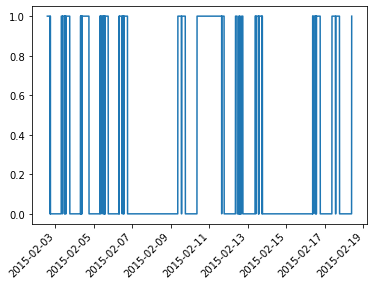

In [45]:
ts = df['Occupancy']
plt.plot(ts)
plt.xticks(rotation=45, ha='right')
plt.show()

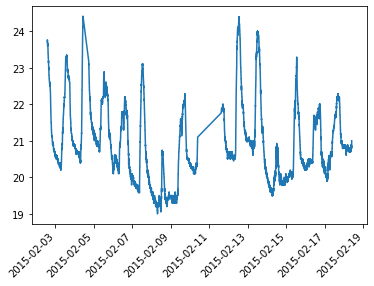

In [46]:
ts = df['Temperature']
plt.plot(ts)
plt.xticks(rotation=45, ha='right')
plt.show()

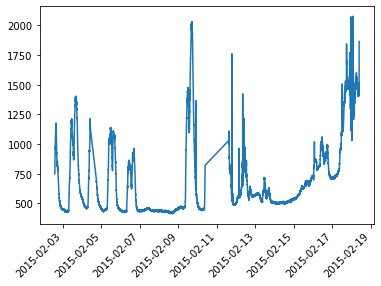

In [47]:
ts = df['CO2']
plt.plot(ts)
plt.xticks(rotation=45, ha='right')
plt.show()

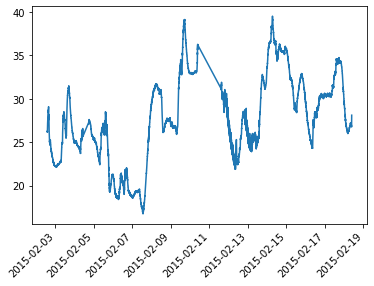

In [48]:
ts = df['Humidity']
plt.plot(ts)
plt.xticks(rotation=45, ha='right')
plt.show()

### Splitting the dataset

In [49]:
index1=np.random.choice(df.index,10280,replace=False)

In [50]:
df_h=df.drop(index=index1,axis=0)

In [51]:
df_h.shape
df_h.head()

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-02 14:21:00,23.730,26.230,572.666667,769.666667,1
2015-02-02 14:25:00,23.730,26.290,536.333333,798.000000,1
2015-02-02 14:26:59,23.754,26.350,476.000000,803.200000,1
2015-02-02 14:31:59,23.700,26.700,469.000000,845.333333,1
2015-02-02 14:32:59,23.700,26.774,464.000000,852.400000,1


In [52]:
index2=np.random.choice(df.index,10280,replace=False)

In [53]:
df_2=df.drop(index=index2,axis=0)
df.head()

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,1
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,1


### Comparing the two datatset

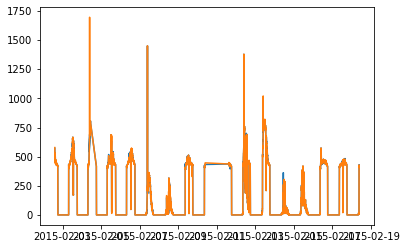

In [54]:
ts1 = pd.Series(df_h['Light'])
ts2 = pd.Series(df_2['Light'])
plt.plot(ts1)
plt.plot(ts2)
plt.show()

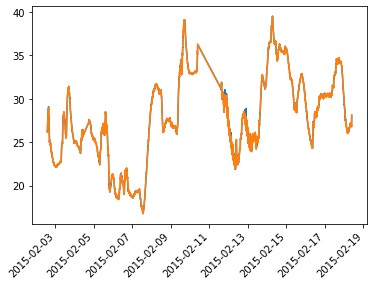

In [55]:
ts1 = pd.Series(df_h['Humidity'])
ts2 = pd.Series(df_2['Humidity'])
plt.plot(ts1)
plt.plot(ts2)
plt.xticks(rotation=45, ha='right')
plt.show()

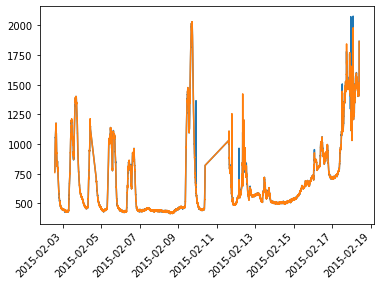

In [56]:
ts1 = pd.Series(df_h['CO2'])
ts2 = pd.Series(df_2['CO2'])
plt.plot(ts1)
plt.plot(ts2)
plt.xticks(rotation=45, ha='right')
plt.show()

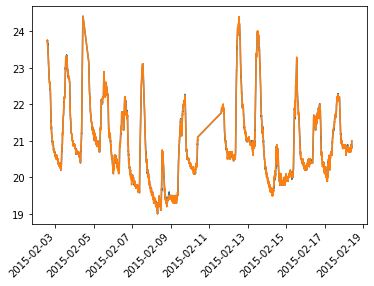

In [57]:
ts1 = pd.Series(df_h['Temperature'])
ts2 = pd.Series(df_2['Temperature'])
plt.plot(ts1)
plt.plot(ts2)
plt.xticks(rotation=45, ha='right')
plt.show()

## Distances and transformations

In [80]:
from scipy.spatial.distance import euclidean, cityblock

In [82]:
ts1 = pd.Series(df_h['Temperature'])
ts2 = pd.Series(df_2['Temperature'])
dist = euclidean(ts1, ts2)
man_dist= cityblock(ts1,ts2)
print(dist, man_dist)


34.81740715513985 1767.3230952380943


OFFSET TRANSLATION

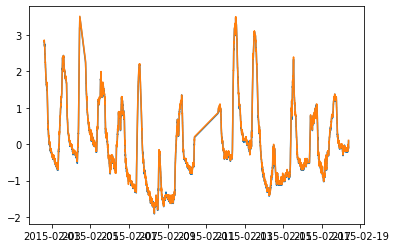

In [86]:
plt.plot(ts1 - ts1.mean())
plt.plot(ts2 - ts2.mean())
plt.show()

In [87]:
ts1 = ts1 - ts1.mean()
ts2 = ts2 - ts2.mean()
dist = euclidean(ts1, ts2)
dist

34.757787210616414

Amplitude Scaling

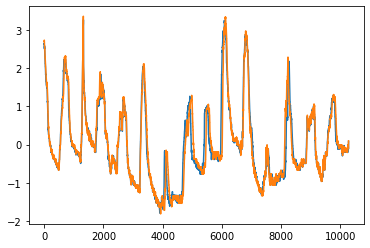

In [83]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(ts1).flatten()
ts2_scaled = scaler.fit_transform(ts2).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

In [84]:
dist = euclidean(ts1_scaled, ts2_scaled) 
dist

32.827339891681895

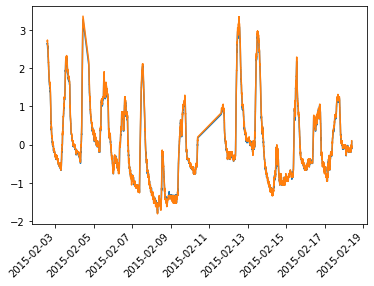

In [66]:
plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.xticks(rotation=45, ha='right')
plt.show()

In [67]:
dist = euclidean((ts1 - ts1.mean())/ts1.std(), (ts2 - ts2.mean())/ts2.std()) 
dist

32.82574319234977

Noise

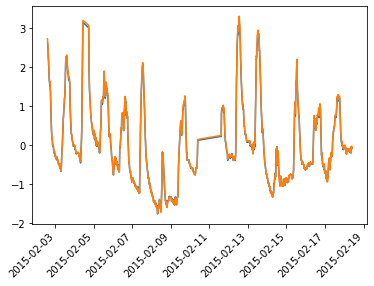

In [68]:
w = 7
plt.plot(((ts1 - ts1.mean())/ts1.std()).rolling(window=w).mean())
plt.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean())
plt.xticks(rotation=45, ha='right')
plt.show()

# Features extraction

In [95]:
import numpy as np
import scipy.stats as stats

In [96]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [97]:
features = calculate_features(df_h['CO2'])

In [98]:
features

{'avg': 688.9433717806183,
 'std': 309.44088319084403,
 'var': 95753.6601899296,
 'med': 564.5,
 '10p': 438.0,
 '25p': 460.57500000000005,
 '50p': 564.5,
 '75p': 802.0625,
 '90p': 1144.0,
 'iqr': 341.48749999999995,
 'cov': 2.2264135387557067,
 'skw': 1.6669062126718113,
 'kur': 2.456075592123561}

In [99]:
features2=calculate_features(df_2['CO2'])

In [100]:
features2

{'avg': 689.5018319205117,
 'std': 310.6640529191812,
 'var': 96512.15377617182,
 'med': 565.0,
 '10p': 438.0,
 '25p': 459.5,
 '50p': 565.0,
 '75p': 802.5,
 '90p': 1150.025,
 'iqr': 343.0,
 'cov': 2.21944517056785,
 'skw': 1.6607428920602547,
 'kur': 2.4310263757139507}

In [101]:
a=[]
for valore in features.values():
    a.append(valore)

In [102]:
b=[]
for valore in features2.values():
    b.append(valore)

In [103]:
dist = euclidean(a,b)
dist

758.5214330650231